<a href="https://colab.research.google.com/github/Costa200513/Clasificacion-de-tumores-con-K-Nearest-Neighbors/blob/main/Clasificacion_de_tumores_con_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

cols = ['radius_mean','texture_mean','perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
sns.pairplot(df[cols  ])
plt.show()

In [ ]:
sns.heatmap(df[cols].corr(), annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

x=df[['radius_mean', 'perimeter_mean', 'area_mean']]
y=df['diagnosis'].replace({'B': 0, 'M': 1})

Scaler=StandardScaler()
xS=Scaler.fit_transform(x)

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(xS, y)

In [45]:
import numpy as np
radius_mean = float(input("Ingrese promedio del radio de las celulas: "))
perimeter_mean = float(input("Ingrese promedio del perímetro de las celulas:"))
area_mean = float(input("Ingrese promedio del área de las celulas: "))

entrada = np.array([[radius_mean, perimeter_mean, area_mean]])

entrada_scaled = Scaler.transform(entrada)
prediccion = kn.predict(entrada_scaled)
if (prediccion[0]==1):
    print("Maligno")
else:
    print("Benigno")

Ingrese promedio del radio de las celulas: 20.5
Ingrese promedio del perímetro de las celulas:130
Ingrese promedio del área de las celulas: 1200
Maligno


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


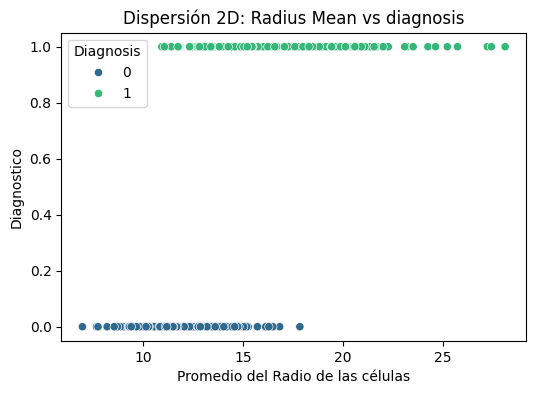

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(6,4))
sb.scatterplot(data=df, x="radius_mean", y="diagnosis", hue="diagnosis", palette="viridis")
plt.title("Dispersión 2D: Radius Mean vs diagnosis")
plt.xlabel("Promedio del Radio de las células")
plt.ylabel("Diagnostico")
plt.legend(title="Diagnosis")
plt.show()

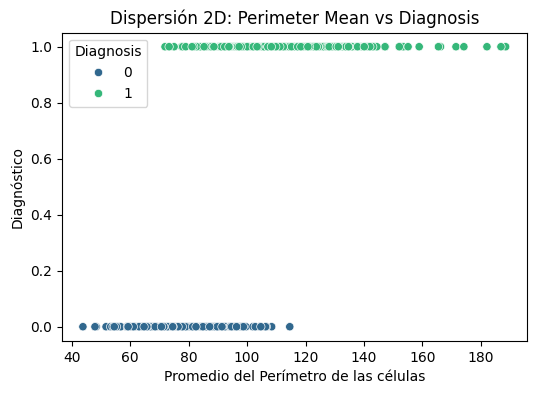

In [ ]:
plt.figure(figsize=(6,4))
sb.scatterplot(data=df, x="perimeter_mean", y="diagnosis", hue="diagnosis", palette="viridis")
plt.title("Dispersión 2D: Perimeter Mean vs Diagnosis")
plt.xlabel("Promedio del Perímetro de las células")
plt.ylabel("Diagnóstico")
plt.legend(title="Diagnosis")
plt.show()

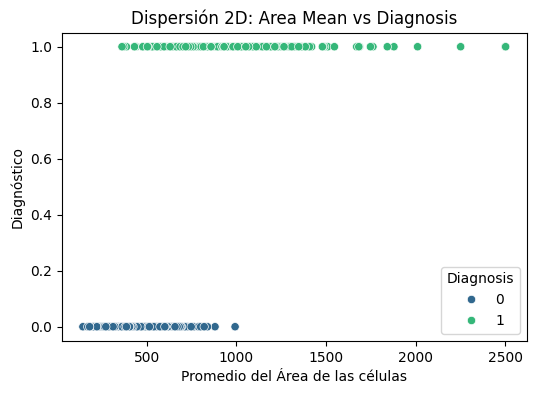

In [ ]:
plt.figure(figsize=(6,4))
sb.scatterplot(data=df, x="area_mean", y="diagnosis", hue="diagnosis", palette="viridis")
plt.title("Dispersión 2D: Area Mean vs Diagnosis")
plt.xlabel("Promedio del Área de las células")
plt.ylabel("Diagnóstico")
plt.legend(title="Diagnosis")
plt.show()

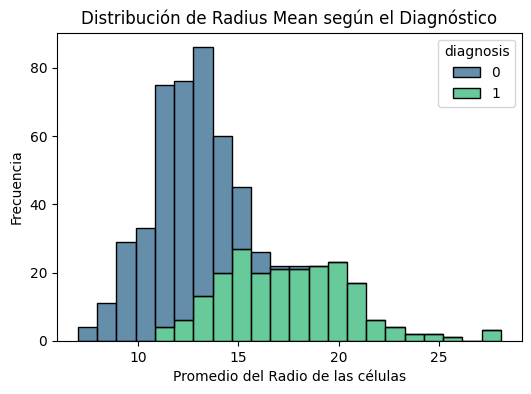

In [ ]:
plt.figure(figsize=(6,4))
sb.histplot(data=df, x="radius_mean", hue="diagnosis", multiple="stack", palette="viridis")
plt.title("Distribución de Radius Mean según el Diagnóstico")
plt.xlabel("Promedio del Radio de las células")
plt.ylabel("Frecuencia")
plt.show()

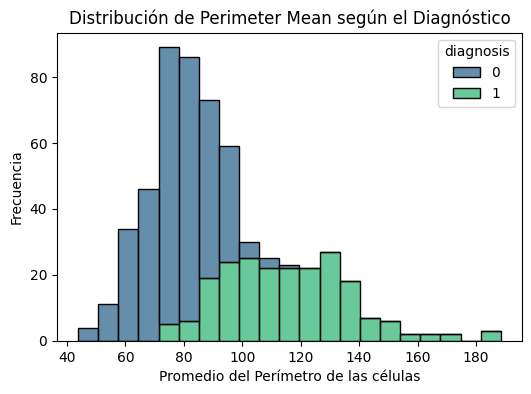

In [ ]:
plt.figure(figsize=(6,4))
sb.histplot(data=df, x="perimeter_mean", hue="diagnosis", multiple="stack", palette="viridis")
plt.title("Distribución de Perimeter Mean según el Diagnóstico")
plt.xlabel("Promedio del Perímetro de las células")
plt.ylabel("Frecuencia")
plt.show()

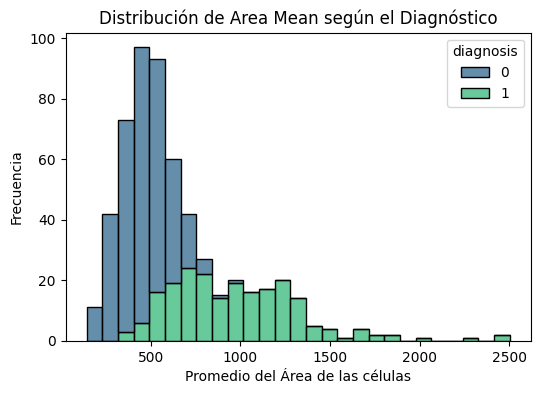

In [ ]:
plt.figure(figsize=(6,4))
sb.histplot(data=df, x="area_mean", hue="diagnosis", multiple="stack", palette="viridis")
plt.title("Distribución de Area Mean según el Diagnóstico")
plt.xlabel("Promedio del Área de las células")
plt.ylabel("Frecuencia")
plt.show()